In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
N = 1000
x = np.arange(0, N)
f1 = .0 * x
f1[400:600] = 1
f2 = x // 1
f3 = np.sin(np.pi * x / N) * np.sin(20 * np.pi * x / N)

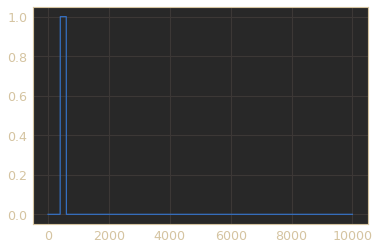

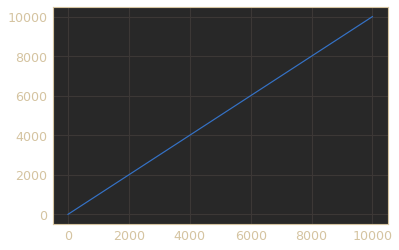

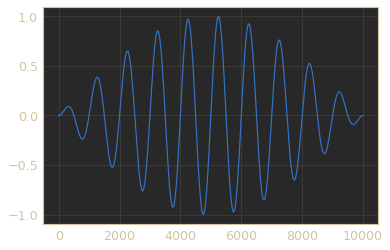

In [45]:
plt.plot(x, f1)
plt.show()
plt.plot(x, f2)
plt.show()
plt.plot(x, f3)
plt.show()

In [46]:
def dft(y):
    N = len(y)
    n = np.arange(N)
    c = np.zeros(N//2 + 1, complex)
    for k in range(N//2 + 1):
        c[k] = y.dot(np.exp(-2j * np.pi * k * n / N))
    return c

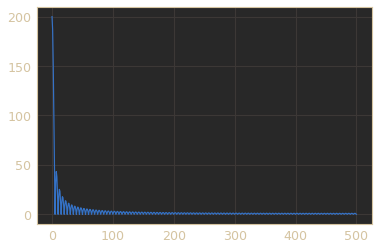

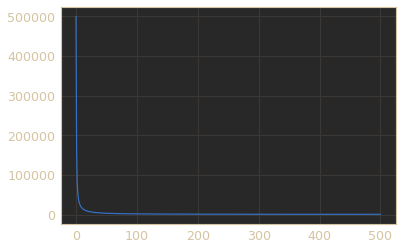

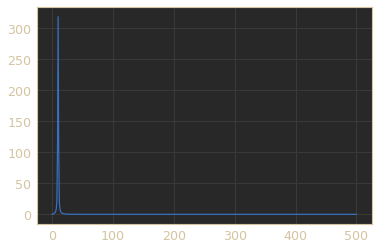

In [7]:
for f in [f1, f2, f3]:
    plt.plot(abs(dft(f)))
    plt.show()

Vemos dois picos se aumentarmos a frequência do seno, no terceiro caso:

In [8]:
f4 = np.sin(10 * np.pi * x / N) * np.sin(20 * np.pi * x / N)

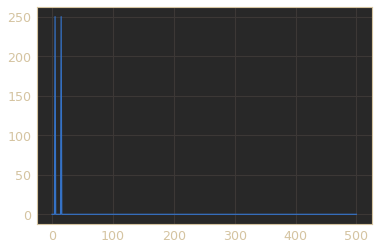

In [9]:
plt.plot(abs(dft(f4)))
plt.show()

In [49]:
def dft1(y):
    N = len(y)
    n = np.arange(N)
    c = np.zeros(N//2 + 1, complex)
    for k in range(N//2 + 1):
        c[k] = y.dot(np.exp(-2j * np.pi * k * n / N))
    return c
%timeit -n 1 dft1(f3)

1.89 s ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
def dft2(y):
    N = len(y)
    n = np.arange(N)
    c = np.zeros(N//2 + 1, complex)
    k = np.arange(N // 2 + 1)
    nn, kk = np.meshgrid(n, k, sparse = True)
    A = np.exp(-2j * np.pi * nn * kk / N)
    c = A.dot(y)
    return c

In [55]:
%timeit -n 1 dft2(f3)

2.33 s ± 17.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
